# Data Analysis of No Show Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

No Show up dataset is a collection of paitent whom have scheduled an appointment in hospitals in Brazil. This collection contains the patient medical status, Gender Age, schedulling and appointment date and wheteher the paitent showed up to his appointment or not.
We can gatehr many information like: which Neighborhood has the ost appointments among its hospitals? Which day of the week has more appointment? Do males or females get more appointment at different ages that other? What factors are important for us to know whether a a paitent will show up for their scheduled appointment?

     

In [ ]:
# Set up import statements for all of the packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Render plots inline
%matplotlib inline   



<a id='wrangling'></a>
## Data Wrangling

### Load and display data

In [ ]:
# lodad the data file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# show few lines with header
df.head()

### Findings:

1. No-Show variable is confusing.
2. **ScheduledDay**  contains  time stamp while the time is not recorded in **AppointmentDay**

### Checking Dataframe columns and data

In [4]:
# dataset information to findout the missnig data.
df.info() ;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Findings:
    1. No missing values.

In [ ]:
df.describe() # show description of the date 

### Findings:
1. columns (Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received) are int64. Converting them to boolean will save some coding in the exploration and memory
2. minimum age is -1.  

### Checking duplicates

In [ ]:
# sum of duplicated rows
df.duplicated().sum()

### Findings:
1. No duplicates

### Datea cleaning
1. For conveinence, will convert 'No-Show' to 'Show' while True means the paitent 'show up'


In [8]:
df['show'] = df['No-show'].apply(lambda x: True if x=='No' else False ) # converting
df = df.drop('No-show', axis=1) # drop old column


In [9]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,True


1. Convert Data columns to DataTime type to ease the exploration
2.a creat  DateDelta columns showing the difference between the SchedulingDay and AppointmentDay.
2.b Select only the records in which the SchedulingDay was on/before the AppointmentDay.


In [10]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
# creat column 'Day' containging the day of the week of the appointment
df['Day'] = pd.to_datetime(df['AppointmentDay']).dt.dayofweek

df['Day'] = df['Day'].map(lambda x: days[x]) # convert the value of day from int (0) to string 'Monday'
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date # convert from object to date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date # convert from object to date
df['DateDelta'] = df['AppointmentDay'] - df['ScheduledDay'] # calculate the difference 
df = df[df['DateDelta'] >= '0 days'] # Drop records where the appointment is before the scheduling as it doen't make sense 


In [11]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,Day,DateDelta
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,True,Friday,0 days
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,True,Friday,0 days
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,True,Friday,0 days
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True,Friday,0 days
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,True,Friday,0 days


convert (Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received) to boolean

In [12]:
bool_cols = ["Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"] # required columns
df[bool_cols] = df[bool_cols].astype(bool) # convert to bool


1. Delte rows with age < 0

In [ ]:
df = df.drop(df[df['Age']<0].index, axis=0) # drop the records where the age is negative.

## Exploratory Data Analysis

#### Exploring Age variance 

In [ ]:
df['Age'].plot(kind = 'box')
plt.show()

### Exploring Handicap distribution

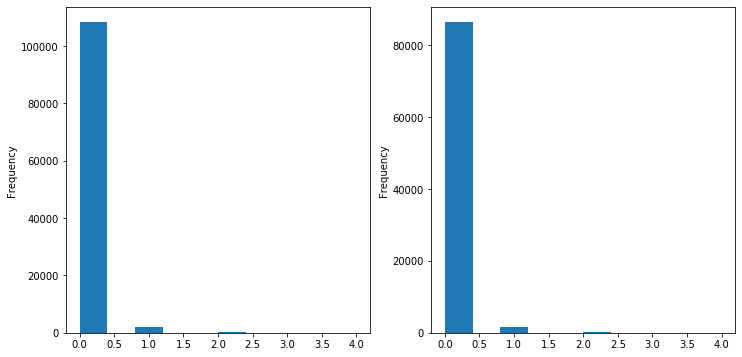

In [8]:
# plot histogram before converting data type.
plt.subplot(1,2,1)
df['Handcap'].plot(kind = 'hist', figsize =(12,6)) # plotting histogram to see the distribution of handicaped amont the patients

plt.subplot(1,2,2)
df[df['show']]['Handcap'].plot(kind='hist', figsize =(12,6)) # plotting histogram to see the distribution of handicaped amont the patients
plt.show()


the vast Majority of Patients are not hadnicaped
### which Neighbourhood has the most appointments among its hospitals?

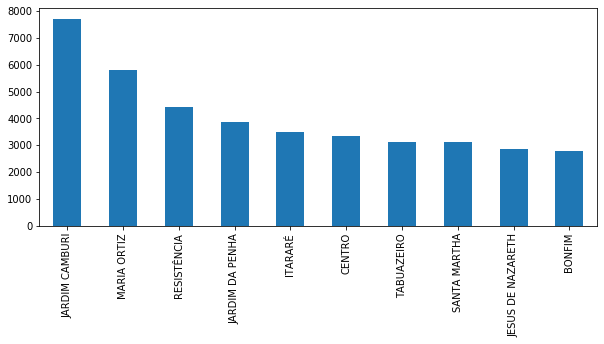

In [14]:
# plotting the top 10 neighbourhoods with the most number of the appointments
df['Neighbourhood'].value_counts()[0:10].plot(kind='bar',rot=90,  figsize =(10,4))
#plt.ylabel('No. appointments')
#plt.title('The nubmer of Appintment per Neighbourhood for the top 10')
plt.show()

Do Jardim Camburi and the following two neighborhoods have some health issues? or do they have good hospitals that people form other neighbourhoods come to these threee. This is an area that can be investigated more.

### Which Day of the week had more appointments?

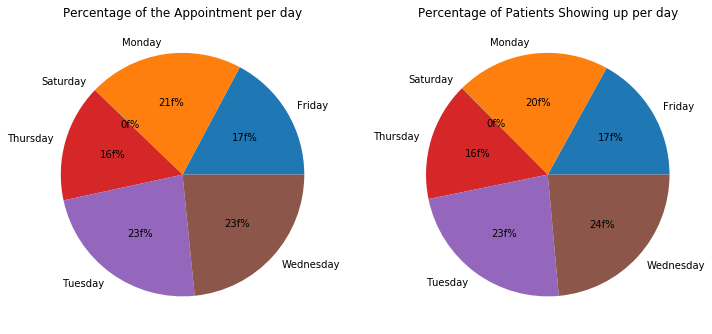

In [15]:
# plotting the percentage of the appointments per each day of the week
plt.subplot(1,2,1)
df.groupby('Day')['AppointmentDay'].count().plot(kind='pie', autopct = '%1.0ff%%', figsize =(12,6))
plt.title('Percentage of the Appointment per day')
plt.ylabel("")

plt.subplot(1,2,2)
df.groupby('Day')['show'].sum().plot(kind='pie', autopct = '%1.0ff%%', figsize =(12,6))
plt.title('Percentage of Patients Showing up per day')
plt.ylabel("")

plt.show()


Wednesday and Tuesday have more appointments in general then other days even though the percentage in other day is relatively close except for Saturday which has only 39 and Sunday which doesn't have any appointment at all. This an area that can be invetigated more

### Do males of females get more appointment at different ages than others?

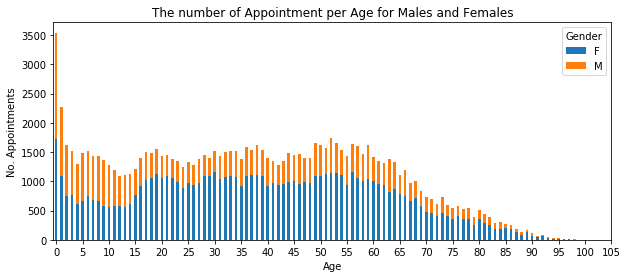

In [16]:
df.groupby(['Age','Gender'])['PatientId'].count().unstack().plot(kind='bar',stacked=True, rot=0, figsize=(10,4))
locs = np.arange (0,110,5) # create and index of multiples of 5 to avoid jamming the plots
plt.xticks(locs,locs)
plt.ylabel("No. Appointments")
plt.title("The number of Appointment per Age for Males and Females")
plt.show()


### What factors are important for us to know whether a patient will show up for their scheduled appoinment?


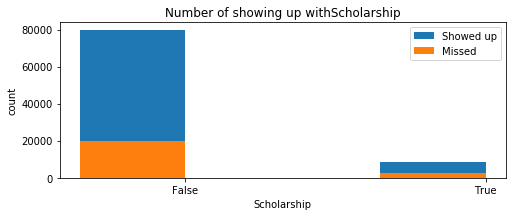

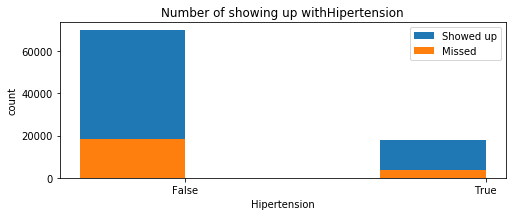

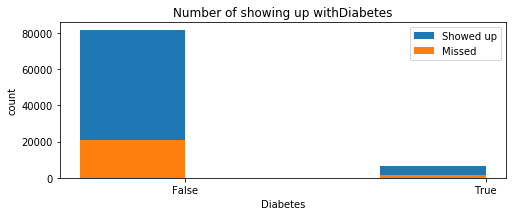

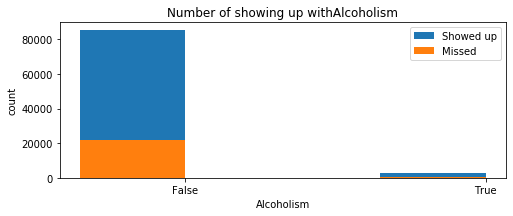

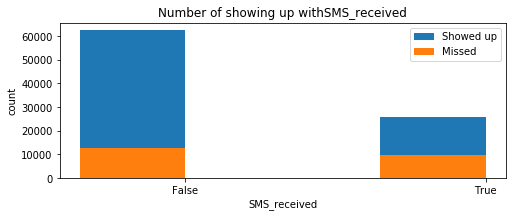

In [17]:
# plotting graphs for theese columns to see wheter this condition
# affected the number of the patient showing up

cols = ['Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received']
dic = {}
index  = np.arange(2)
bar_width = 0.35
i = 1
for col in cols:
    plt.figure(figsize=(8,20))
    # counting the number of people whom showed up for each value in the target columns
    showed  = df.groupby([col,'show'])['show'].count().unstack()[True]
    # counting the number of people whom did no show up
    nshowed  = df.groupby([col,'show'])['show'].count().unstack()[False]
    plt.subplot(6,1,i)
    plt.bar(index,showed,bar_width,label='Showed up')
    plt.bar(index,nshowed,bar_width,label='Missed')
    plt.xlabel(col)
    plt.ylabel("count")
    plt.title('Number of showing up with' + col)
    plt.xticks(index + bar_width/2, ('False','True'))
    plt.legend()
    i+=1

#plt.figure(figsize(8,20))
#count of patient showng up per date delta value from 0 to 29 days
# ....
# ....


plt.show()
    

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## References